In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_train, 
                                                    y_train, test_size=.3,
                                                    shuffle=True)

In [4]:
print(X_train.shape)
print(28 * 28)

(42000, 28, 28)
784


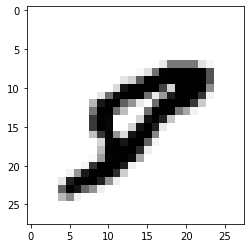

In [5]:
plt.imshow(X_train[0], cmap='Greys')

Predicting the handwritten number is a classification problem. This is why we have to encode the numbers 0-9 as categories. 

In [6]:
X_train = X_train.reshape(-1, 784).astype('float')
X_valid = X_valid.reshape(-1, 784).astype('float')
X_test = X_test.reshape(-1, 784).astype('float')

X_train /= 255.0
X_valid /= 255.0
X_test /= 255.0

n_classes=10

y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)
y_test = to_categorical(y_test, n_classes)

In [7]:
input_shape = (784, )

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=input_shape))
# model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

early_stopping = EarlyStopping(patience=2)

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', 
              metrics=['accuracy'])

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),
          callbacks=[early_stopping])

Epoch 1/10
1313/1313 [==============================] - 5s 3ms/step - loss: 1.1899 - accuracy: 0.6292 - val_loss: 0.5867 - val_accuracy: 0.8490
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4930 - accuracy: 0.8668 - val_loss: 0.4023 - val_accuracy: 0.8883
Epoch 3/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3875 - accuracy: 0.8911 - val_loss: 0.3499 - val_accuracy: 0.9018
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3468 - accuracy: 0.9032 - val_loss: 0.3217 - val_accuracy: 0.9076
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3240 - accuracy: 0.9083 - val_loss: 0.3030 - val_accuracy: 0.9124
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3087 - accuracy: 0.9128 - val_loss: 0.2976 - val_accuracy: 0.9142
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2972 - accuracy: 0.9151 - val_loss: 0.2842 - val_accuracy:

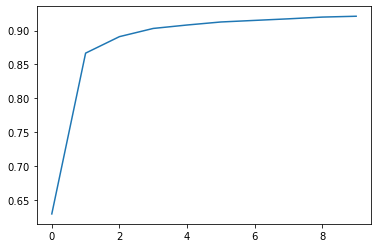

In [9]:
plt.subplot(111)

epochs = list(range(10))
plt.plot(epochs, history.history['accuracy'])

1/1 [==============================] - 0s 121ms/step
[[7.8888115e-05 5.7185310e-09 2.2658511e-04 3.9844918e-03 1.9134852e-07
  6.8699585e-05 5.9003691e-10 9.9552709e-01 6.3178809e-06 1.0759861e-04]]
7


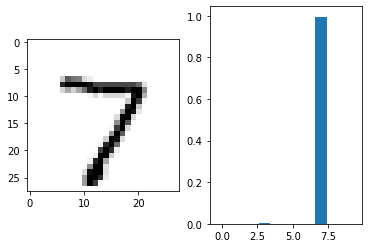

In [10]:
pred = model.predict(X_valid[0].reshape(1, 784))
plt.subplot(121)
plt.imshow(X_valid[0].reshape(28, 28), cmap='Greys')
print(pred)

plt.subplot(122)
plt.bar(range(10), pred[0])
print(np.argmax(pred))

#### Tuning Hyperparameters 

We can set hyperparameters to many different values. To find the most optimal ones, we can try using random search and test those on validation set or k-fold-cross validation.

In [11]:
from sklearn.datasets import fetch_california_housing
from models import build_model

In [12]:
housing = fetch_california_housing()

In [13]:
print(housing['data'].shape)
print(housing['target'].shape)

(20640, 8)
(20640,)


In [14]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target,
                                                    shuffle=True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                    y_train_full,
                                                    shuffle=True)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_valid)
_ = scaler.transform(X_test)

In [16]:
from sklearn.model_selection import RandomizedSearchCV

In [17]:
keras_reg = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\julia\AppData\Local\Temp\ipykernel_7864\2189228328.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [18]:
keras_reg.fit(X_train, y_train, epochs=10, 
              validation_data=(X_valid, y_valid), 
              callbacks=[EarlyStopping(patience=2)])

mse_test = keras_reg.score(X_test, y_test)


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 11740391066381287493206016.0000 - val_loss: 1994702962495036850176.0000
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 453704553963441881088.0000 - val_loss: 25257767808014483456.0000
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 5744985638524944384.0000 - val_loss: 319823537105797120.0000
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 72745269841625088.0000 - val_loss: 4049717684076544.0000
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 921127878656000.0000 - val_loss: 51279204188160.0000
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 11663668412416.0000 - val_loss: 649315418112.0000
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 147689570304.0000 - val_loss: 8221873664.0000
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 1870

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal

params_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.array([10, 20]),
    'learning_rate': reciprocal(3e-4, 3e-2)
}

rnd_search = RandomizedSearchCV(keras_reg, 
                                params_distribs, 
                                n_iter=10, cv=3)
rnd_search.fit(X_train, y_train, epochs=10, 
validation_data=(X_valid, y_valid),
callbacks=[EarlyStopping(patience=2)]
)

Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 2s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 2s 4ms/step - loss: inf - val_loss: inf
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 32462999302076319671550243973890048.0000 - val_loss: 10609836404984510011926380544.0000
Epoch 3/10
242/242 [==============================] - 1s 3ms/step - loss: 619420193985064945347198976.0000 - val_loss: 202444227152814538752.0000
Epoch 4/10
242/242 [==============================] - 1s 3ms/step - loss: 11819033117010690048.0000 - val_loss: 3862794076160.0000
Epoch 5/10
242/242 [==============================] - 1s 3ms/step - loss: 225516404736.0000 - val_loss: 73721.4766
Epoch 6/10
242/242 [==============================] - 1s 3ms/step - loss: 4304.1729 - val_loss: 1.3669
Epoch 7/10
242/242 [==============================] - 1s 3ms/step - loss: 1.3451 - val_loss: 1.3636
Epoch 8/10
242/242 [==============================] - 1s 3ms/step - loss: 1.3452 - val_loss: 1.3656
Epoch 9/10
121/121 [==============================] - 0s 2ms

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: inf - val_loss: 2704474372405081015220296029831168.0000
Epoch 2/10
242/242 [==============================] - 1s 3ms/step - loss: 157891776013581757196566911778816.0000 - val_loss: 51603604401325826944008192.0000
Epoch 3/10
242/242 [==============================] - 1s 3ms/step - loss: 3012700336609656439832576.0000 - val_loss: 984637195526602752.0000
Epoch 4/10
242/242 [==============================] - 1s 4ms/step - loss: 57484817247240192.0000 - val_loss: 18787670016.0000
Epoch 5/10
242/242 [==============================] - 1s 4ms/step - loss: 1096855296.0000 - val_loss: 358.9935
Epoch 6/10
242/242 [==============================] - 1s 3ms/step - loss: 22.2444 - val_loss: 1.3676
Epoch 7/10
242/242 [==============================] - 1s 3ms/step - loss: 1.3146 - val_loss: 1.3626
Epoch 8/10
242/242 [==============================] - 1s 3ms/step - loss: 1.3149 - val_loss: 1.3688
Epoch 9/10
121/121 [=========================

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 2ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/10
121/121 [==============================] - 0s 1ms/step - loss: nan
Epoch 1/10


c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 85658399932416.0000 - val_loss: 3120509440.0000
Epoch 2/10
242/242 [==============================] - 1s 3ms/step - loss: 2702815744.0000 - val_loss: 2320840448.0000
Epoch 3/10
242/242 [==============================] - 1s 3ms/step - loss: 2010183296.0000 - val_loss: 1726095104.0000
Epoch 4/10
242/242 [==============================] - 1s 3ms/step - loss: 1495048832.0000 - val_loss: 1283760384.0000
Epoch 5/10
242/242 [==============================] - 1s 3ms/step - loss: 1111922176.0000 - val_loss: 954780224.0000
Epoch 6/10
242/242 [==============================] - 1s 3ms/step - loss: 826977408.0000 - val_loss: 710105792.0000
Epoch 7/10
242/242 [==============================] - 1s 3ms/step - loss: 615053504.0000 - val_loss: 528132032.0000
Epoch 8/10
242/242 [==============================] - 1s 3ms/step - loss: 457437888.0000 - val_loss: 392791296.0000
Epoch 9/10
242/242 [==============================] - 1s 3ms/step - lo

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 927651397632.0000 - val_loss: 26647490.0000
Epoch 2/10
242/242 [==============================] - 1s 3ms/step - loss: 23081026.0000 - val_loss: 19818664.0000
Epoch 3/10
242/242 [==============================] - 1s 3ms/step - loss: 17166206.0000 - val_loss: 14739841.0000
Epoch 4/10
242/242 [==============================] - 1s 3ms/step - loss: 12767146.0000 - val_loss: 10962528.0000
Epoch 5/10
242/242 [==============================] - 1s 3ms/step - loss: 9495399.0000 - val_loss: 8153206.0000
Epoch 6/10
242/242 [==============================] - 1s 3ms/step - loss: 7062078.5000 - val_loss: 6063811.5000
Epoch 7/10
242/242 [==============================] - 1s 3ms/step - loss: 5252328.0000 - val_loss: 4509852.0000
Epoch 8/10
242/242 [==============================] - 1s 3ms/step - loss: 3906350.0000 - val_loss: 3354126.0000
Epoch 9/10
242/242 [==============================] - 1s 3ms/step - loss: 2905296.5000 - val_loss: 2494

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 317325446687490048.0000 - val_loss: 28648572715008.0000
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 24813900922880.0000 - val_loss: 21306990919680.0000
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 18455000514560.0000 - val_loss: 15846815563776.0000
Epoch 4/10
242/242 [==============================] - 1s 3ms/step - loss: 13725665853440.0000 - val_loss: 11785835905024.0000
Epoch 5/10
242/242 [==============================] - 1s 3ms/step - loss: 10208264847360.0000 - val_loss: 8765557440512.0000
Epoch 6/10
242/242 [==============================] - 1s 3ms/step - loss: 7592256471040.0000 - val_loss: 6519267524608.0000
Epoch 7/10
242/242 [==============================] - 1s 4ms/step - loss: 5646642577408.0000 - val_loss: 4848615948288.0000
Epoch 8/10
242/242 [==============================] - 1s 4ms/step - loss: 4199617921024.0000 - val_loss: 3606095069184.0000
Epoch 

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


200/242 [=======================>......] - ETA: 0s - loss: nan

KeyboardInterrupt: 

In [ ]:
rnd_search.best_params_

{'learning_rate': 0.0011800629361042776, 'n_hidden': 1, 'n_neurons': 10}

In [23]:
import pandas as pd

In [25]:
season_data = pd.read_csv('../data/games_tourney.csv')

In [26]:
season_data.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


In [27]:
print(season_data.shape)

(4234, 9)


In [28]:
X = season_data['seed_diff']
y = season_data['score_diff']

When it comes to choosing appropriate train and test sample sizes
1. If you have very small dataset, you should use cross validation
2. If the dataset is large enough, you may use 80/20 split (Pareto rule). The training set may be further split to test the performance on the validation set. 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    shuffle=True,
                                                    random_state=42)

Here this model is the same as linear regression

In [30]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_tensor = Input(shape=(1,))
output_tensor = Dense(1)(input_tensor)
model = Model(input_tensor, output_tensor)

model.compile(optimizer='sgd', loss='mae')


In [31]:
epochs = 30

history = model.fit(X_train, y_train, 
          batch_size=64, 
          validation_split=.2,
          verbose=False,
          epochs=epochs)


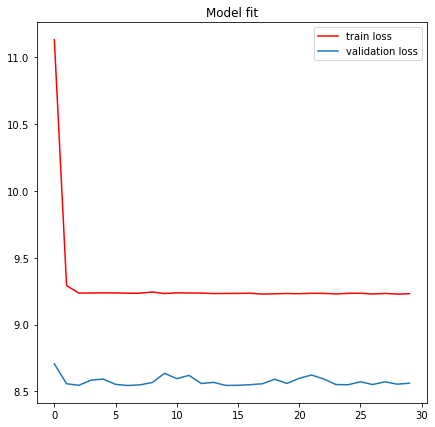

In [32]:
_, ax = plt.subplots(figsize=(7, 7))

ax.plot(np.arange(epochs), history.history['loss'], c='red', label='train loss')

# twin_ax = ax.twinx()
ax.plot(np.arange(epochs), history.history['val_loss'], label='validation loss')

plt.legend()

_ = plt.title('Model fit')

In [33]:
model.evaluate(X_test, y_test)

40/40 [==============================] - 0s 2ms/step - loss: 9.2710


9.271003723144531

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

lin_reg = LinearRegression()
scores = - cross_val_score(lin_reg, 
                         X_train[:, np.newaxis], y_train[:, np.newaxis],
                         cv=5, scoring='neg_mean_absolute_error')

scores

C:\Users\julia\AppData\Local\Temp\ipykernel_7864\2752477510.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train[:, np.newaxis], y_train[:, np.newaxis],


array([9.3483583 , 9.36959447, 9.51912314, 8.70292542, 8.58615697])

In [ ]:
lin_reg.score()

In [39]:
X_train[:, np.newaxis].shape

C:\Users\julia\AppData\Local\Temp\ipykernel_7864\51532542.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train[:, np.newaxis].shape


(2963, 1)